<a href="https://colab.research.google.com/github/jimmynorman/Bootcamp_industria4.0/blob/main/03_Prediccion_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import random

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# 1. Analizar los datos

Ahora sí, vamos a cargar todas las herramientas para empezar a trabajar, para comenzar Keras y Tensorflow. Voy a cargar lo mínimo necesario para poder aunque sea VER una imagen

In [ ]:
# Matplotlib
plt.rc('figure', autolayout=True)
# Solamente es formato para que la imagen se vea linda
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore")

Ahora sí, cargamos los datasets

In [ ]:
drive_test = "https://drive.google.com/file/d/1hBoK0ONDI05BKZi3uO9S3Q6v-H0O9NsU/view?usp=sharing"
drive_train = "https://drive.google.com/file/d/1r7xj5Rq2Vtl_TDTgiDsgahM8-pJrk5w3/view?usp=sharing"

ruta_test = 'https://drive.google.com/uc?export=download&id='+drive_test.split('/')[-2]
ruta_train = 'https://drive.google.com/uc?export=download&id='+drive_train.split('/')[-2]

In [ ]:
test = pd.read_csv(ruta_test)
train = pd.read_csv(ruta_train)

# El "train" tiene una columna adicional. Las "Etiquetas"
# Esto sirve para entrenar el modelo.

train2 = train.drop('label',axis=1)
labels = train.pop('label')
# De paso, vemos qué tienen
train2.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.shape,train.shape

((28000, 784), (42000, 784))

# 2. Evaluamos el proceso y preparamos los datos

Vamos a tratar de graficar algo. Primero tenemos que identificar que a cada fila (de 784 columnas/píxeles) en realidad corresponden a un cuadrado de 28x28

Lo que tenemos como una fila, en realidad es ésto:

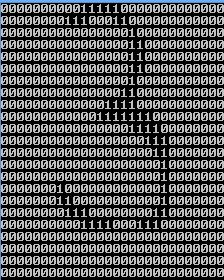

Train Data shape      : (28, 28, 1)
Test Data shape       : (28, 28, 1)


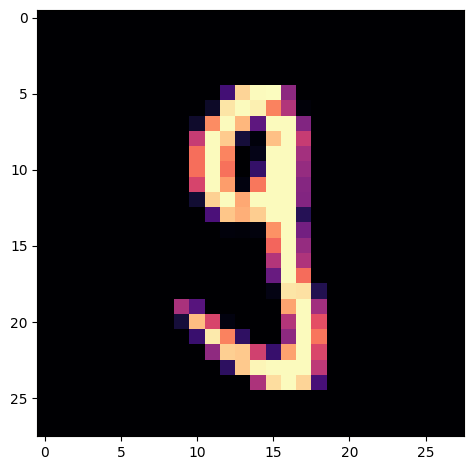

In [ ]:
# Reshape "reordena" los píxeles, de una sola fila de 784 valores,
# a una matriz de 28x28 píxeles.
x_train = train2.values[101].reshape( 28, 28, 1)
x_test  = test.values[101].reshape(28, 28, 1)

print('Train Data shape      :', x_train.shape)
print('Test Data shape       :', x_test.shape)

# Mostramos la imagen
plt.imshow(x_test)

Éxito! Ahora tratemos de graficar 1 número aleatorio, y ahora sí le damos forma al array. Tenemos que hacer reshape de TODO el dataset.


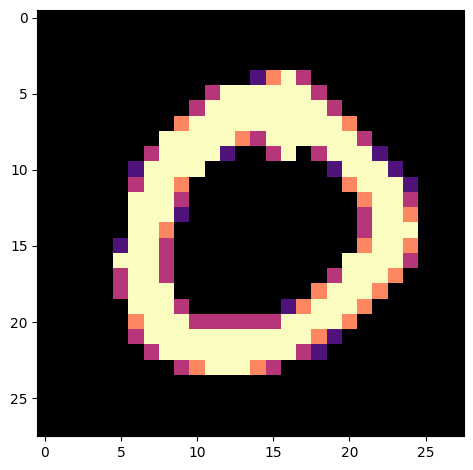

In [ ]:
test_RS = test.values.reshape(test.shape[0],28,28)
test_RS.shape

i = random.randint(0, test.shape[0])

plt.imshow(test_RS[i])

Con el train, tenemos que hacer lo mismo, pero ésta vez le tenemos que agregar la columna "label" que le sacamos

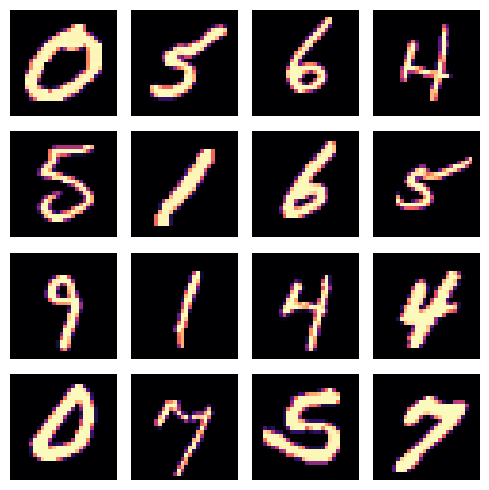

In [ ]:
train_RS = train2.values.reshape(train2.shape[0],28,28)
train_RS.shape

r = random.randint(0, train2.shape[0])


plt.figure(figsize=(5,5))
for i in range(16):
    r = random.randint(0, train2.shape[0])
    image = train_RS[r]
    plt.subplot(4, 4, i+1)
    plt.imshow(tf.squeeze(image))
    plt.axis('off')
plt.show()



Definimos las variables para entrenamiento, y para testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_RS, labels, test_size=0.2, random_state=42)
X_train.shape,y_train.shape

((33600, 28, 28), (33600,))

# 3. Generar el modelo

definimos el modelo

In [ ]:
modelo = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

modelo.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

# 4. Entrenar el modelo

*-Musica de Rocky-* Entrenamos el modelo


In [ ]:
modelo.fit(
    X_train,y_train,
    epochs=20,
)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8114 - loss: 0.6076
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9285 - loss: 0.2322
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9416 - loss: 0.1842
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9468 - loss: 0.1639
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9548 - loss: 0.1409
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9527 - loss: 0.1454
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9586 - loss: 0.1313
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9602 - loss: 0.1230
Epoch 9/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9655 - loss: 0.1076
Epoch 10/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9660 - loss: 0.1030
Epoch 11/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9654 - loss: 0.1076
Epoch 12/20
1050/1050 ━━━━━━━━

# 5. Realizar inferencias

Listo! A probar...

In [ ]:
test_loss, test_acc = modelo.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

263/263 - 1s - 4ms/step - accuracy: 0.9765 - loss: 0.1083

Test accuracy: 0.9765475988388062


# 6. Crear predicciones

In [ ]:
# Con el modelo entrenado, usamos "Predict" para realizar
# nuestras predicciones, usando los datos de prueba
predicciones = modelo.predict(test_RS)

# Guardamos las predicciones en una variable llamada df2
df2 = pd.DataFrame(predicciones)
df2.head()

# Y probamos...

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,0,1,2,3,4,5,6,7,8,9
0,-11.489173,-5.542310,17.605425,0.334167,-5.082538,-6.029871,-9.317859,-0.032709,-3.731726,-13.372145
1,11.143306,-1.636170,-2.228233,-5.589336,-8.124352,-1.756966,1.000821,-5.334692,-6.915381,-0.656259
2,-11.513072,-4.483815,-7.633738,-1.688172,2.560339,-4.942498,-9.298070,-1.236275,-0.986816,7.419717
3,0.534215,-7.766057,-0.615997,-3.281760,0.778191,-5.661547,-3.288622,-1.926503,-1.756356,4.993669
4,-7.699680,-3.917348,4.369331,9.399239,-15.616483,-1.485126,-9.753469,-5.261430,-0.471407,-6.048678


# 7. Procesar / Enviar / Mostrar los datos

El número que se identificó en la imagen es 6
-----------------
La imagen que el algoritmo vio es: 


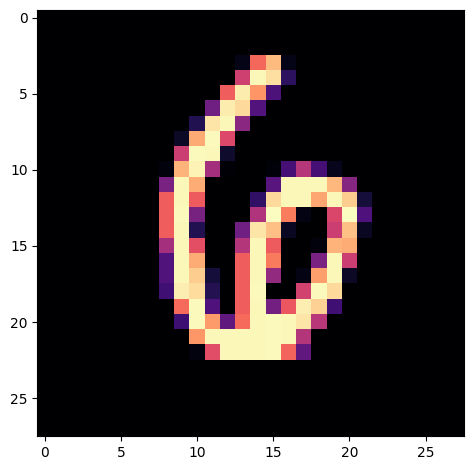

In [ ]:
# Seleccionamos una imagen random
i = random.randint(0, test.shape[0])

# Le decimos al algoritmo que prediga, y nos indique qué número es.
pred=pd.Series(predicciones[i])
print (f"El número que se identificó en la imagen es {pred.idxmax()}")
print("-----------------")
# y finalmente le pedimos a Python que grafique... A ver si es cierto
print("La imagen que el algoritmo vio es: ")
plt.imshow(test_RS[i])

# Probemos con una imagen generada en el momento

In [ ]:
# import required libraries
from PIL import Image

# read an image
img = Image.open('numeroA.png')

# convert image object into array
matrizImagen = np.asarray(img)

foto = np.resize(matrizImagen[:,:,1], (1,28,28))
img

In [ ]:
# Comprobamos a ver si reconoce el número...

pr= modelo.predict(foto)
prediccion = pd.Series(pr[0])
prediccion.idxmax() #toma el número máximo de la serie

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


5